# Assignment 1: Representation, space and embedding (10 pts in total)

In [8]:
# Install the gensim library
!pip install gensim

# Import packages
import gensim.downloader
import numpy as np

You will load a small pre-trained word-embedding model

In [9]:
# Load the pre-trained GloVe model
model = gensim.downloader.load('glove-wiki-gigaword-50')

In [10]:
# Get the embedding vector for the word "woman"
woman_vector = model['woman']

#### ✏️ Do it yourself (1 pt):
Get the dimension of this embedding space.

In [11]:
# Insert your code here
embedding_dim = len(woman_vector)
print(f"The dimension of the embedding space is {embedding_dim}.")

The dimension of the embedding space is 50.


#### ✏️ Do it yourself (1 pt):
Get embeddings for the words “queen”, “uncle” and “tree.”

In [12]:
# Insert your code here
queen_vector = model['queen']
uncle_vector = model['uncle']
tree_vector = model['tree']

#### ✏️ Do it yourself (2 pts):
Compute the Euclidean distance between the embeddings of the following word pairs: (1) "woman" and "queen", (2) "woman" and "uncle", and (3) "woman" and "tree". \
_Hint: use `np.linalg.norm` to compute L2 norm_

In [14]:
# Insert your code here
def euclidean_distance(v1,v2):
  return np.linalg.norm(v1-v2)

ed_woman_queen = euclidean_distance(woman_vector, queen_vector)
ed_woman_uncle = euclidean_distance(woman_vector, uncle_vector)
ed_woman_tree = euclidean_distance(woman_vector, tree_vector)

print(f"The euclidean distance between woman and queen is: {ed_woman_queen}")
print(f"The euclidean distance between woman and uncle is: {ed_woman_uncle}")
print(f"The euclidean distance between woman and tree is: {ed_woman_tree}")


The distance between woman and queen is: 4.825778961181641
The distance between woman and uncle is: 4.893293857574463
The distance between woman and tree is: 6.05571174621582


#### ✏️ Do it yourself (2 pts):
Compute the cosine distance between the embeddings of the following word pairs: (1) "woman" and "queen", (2) "woman" and "uncle", and (3) "woman" and "tree". \
_Hint: use `@` to compute dot product_

In [17]:
# Insert your code here
def cos_distance(v1,v2):
  dot_product = v1@v2
  norm_product = np.linalg.norm(v1)*np.linalg.norm(v2)
  return 1-(dot_product/norm_product)

cd_woman_queen = cos_distance(woman_vector, queen_vector)
cd_woman_uncle = cos_distance(woman_vector, uncle_vector)
cd_woman_tree = cos_distance(woman_vector, tree_vector)

print(f"The cosine distance between woman and queen is: {cd_woman_queen}")
print(f"The cosine distance between woman and uncle is: {cd_woman_uncle}")
print(f"The cosine distance between woman and tree is: {cd_woman_tree}")

The cosine distance between woman and queen is: 0.3996894359588623
The cosine distance between woman and uncle is: 0.4503743648529053
The cosine distance between woman and tree is: 0.6251512169837952


#### ✏️ Do it yourself (1 pt):
Compute the cosine similarity between the embeddings of the following word pairs: (1) "woman" and "queen", (2) "woman" and "uncle", and (3) "woman" and "tree". \
_Hint: compute consine similarity from consine distance_

In [18]:
# Insert your code here
def cos_similarity(v1,v2):
  return 1-cos_distance(v1,v2)

cs_woman_queen = cos_similarity(woman_vector, queen_vector)
cs_woman_uncle = cos_similarity(woman_vector, uncle_vector)
cs_woman_tree = cos_similarity(woman_vector, tree_vector)

print(f"The cosine similarity between woman and queen is: {cs_woman_queen}")
print(f"The cosine similarity between woman and uncle is: {cs_woman_uncle}")
print(f"The cosine similarity between woman and tree is: {cs_woman_tree}")

The cosine similarity between woman and queen is: 0.6003105640411377
The cosine similarity between woman and uncle is: 0.5496256351470947
The cosine similarity between woman and tree is: 0.37484878301620483


#### ✏️ Do it yourself (1 pts):
Combining the above embedding examples, explain why cosine distance is generally preferred over Euclidean distance when comparing embeddings.

Write your answer here:
> **Answer:**
>
> Cosine distance is generally preferred over Euclidean distance because it focuses on the angle between the two vectors, not their magnitudes. When many dimensions are involved, Euclidean distances become less meaningful, but cosine distances don't depend on the absolute value / magnitudes. Also, cosine distances are bounded between -1 and 1, wherease Euclidean distances can vary a lot depending on embedded dimensions.
>   
>   


### Get embedding of an image from a vision model

In [19]:
# Import packages
import torch
from torchvision import models, transforms
from PIL import Image
from IPython.display import display

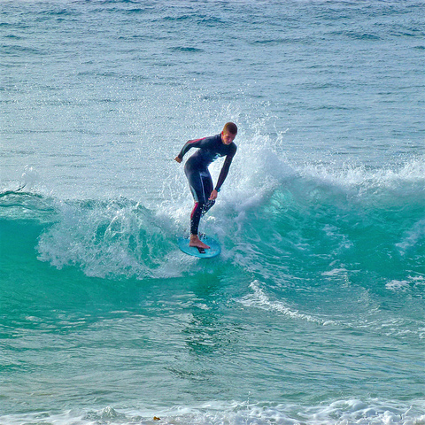

In [20]:
# Download the image file
!wget -O surfing.png "https://drive.google.com/uc?export=download&id=1drpMOkT81nX2GwlvOvjRvs1-YwKlEIQs" -q

# Display the image
img = Image.open("surfing.png")
display(img)

Load in the AlexNet model.
Visualize the model.

In [21]:
# Depending on the version of torchvision, you might need to use:
# model = models.alexnet(pretrained=True) # for torchvision versions < 0.13
model = models.alexnet(weights='IMAGENET1K_V1') # for torchvision versions >= 0.13

# Make the model in evaluation mode, so it does not update weights
model.eval()

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


100%|██████████| 233M/233M [00:01<00:00, 131MB/s]


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

### Demo on how to get activations (i.e., embeddings) from a specific layer of the model
1. Read in the image
2. Preprocess the image to fit the input size of the model
3. Define the hook function (a callback function) and attach it to a specific layer
4. Forward-pass the image to obtain activations (embeddings) from the specified layer

In [22]:
# Set device for computation
device = "cuda" if torch.cuda.is_available() else "cpu"

# Open the image file
input_img = Image.open("surfing.png")

# Preprocess the image to fit the input size of the model
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

# Apply the preprocessing to the input image
input_tensor = preprocess(input_img)

# Add a batch dimension so the model can process the image
x = input_tensor.unsqueeze(0).to(device)  # (1, 3, 224, 224)


# Define a dictionary to store the activations
activations = {}

# Define the hook function. This function will be called during the forward pass.
def hook_fn(name):
    def _hook(module, input, output):
        activations[name] = output.detach()
    return _hook

# Register the hook on the fc7 layer
handle = model.classifier[4].register_forward_hook(hook_fn("fc7"))

# Run the model with the input image to trigger the hook
with torch.no_grad():
    _ = model(x)

# Remove the hook in case you want to register another one later
handle.remove()

# Get the embedding from the fc7 layer
emb = activations["fc7"]

Next, you will download two other images and get their embeddings.

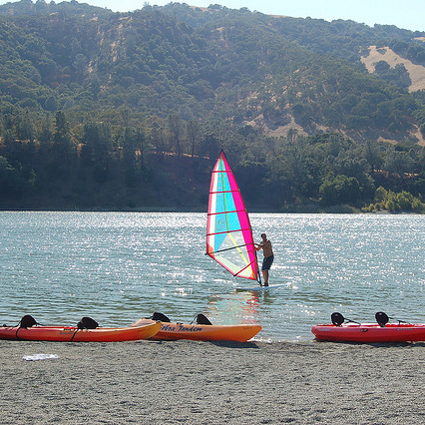

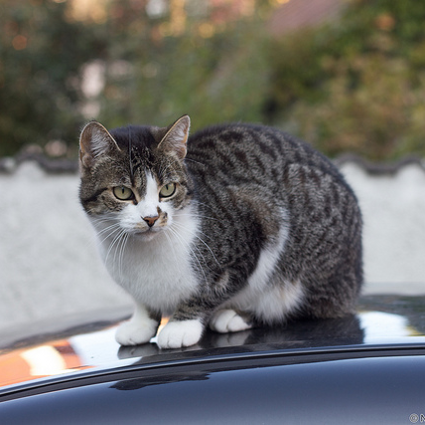

In [23]:
# Download two other image files
!wget -O img01.png "https://drive.google.com/uc?export=download&id=1Y5nIJ_0VOHTWWx2LMpE-oiJuwXoWjU-N" -q
!wget -O img02.png "https://drive.google.com/uc?export=download&id=1zvHbYiO-6N4kma-KLi0XBYSwE2niadjQ" -q

# Display the first image
display(Image.open("img01.png"))

# Display the second image
display(Image.open("img02.png"))

#### ✏️ Do it yourself (2 pts):
Get the embeddings of 'img01' and 'img02' from the _fc7_ layer of Alexnet (1 pt) and compute the cosine distance between the embeddings of image pairs: (1) "surfing" and "img01", (2) "surfing" and "img02" (1 pt)

In [24]:

# Function to get fc7 embedding for an image
def get_fc7_embedding(image_path, model, preprocess, device):
    """
    Extract fc7 layer embedding from AlexNet for a given image.

    Args:
        image_path: Path to the image file
        model: Pre-trained AlexNet model
        preprocess: Image preprocessing pipeline
        device: Device to run computation on

    Returns:
        fc7 embedding as a tensor
    """
    # Dictionary to store activations
    activations = {}

    # Define hook function
    def hook_fn(name):
        def _hook(module, input, output):
            activations[name] = output.detach()
        return _hook

    # Register hook on fc7 layer (classifier[4])
    handle = model.classifier[4].register_forward_hook(hook_fn("fc7"))

    # Load and preprocess image
    input_img = Image.open(image_path)
    input_tensor = preprocess(input_img)
    x = input_tensor.unsqueeze(0).to(device)  # Add batch dimension

    # Run forward pass to trigger hook
    with torch.no_grad():
        _ = model(x)

    # Remove hook
    handle.remove()

    # Return fc7 embedding
    return activations["fc7"]

# Get embeddings for all three images
print("Extracting embeddings from fc7 layer...")
emb_surfing = get_fc7_embedding("surfing.png", model, preprocess, device)
emb_img01 = get_fc7_embedding("img01.png", model, preprocess, device)
emb_img02 = get_fc7_embedding("img02.png", model, preprocess, device)

print(f"Surfing embedding shape: {emb_surfing.shape}")
print(f"Img01 embedding shape: {emb_img01.shape}")
print(f"Img02 embedding shape: {emb_img02.shape}")
print()

# Function to compute cosine distance
def cosine_distance(emb1, emb2):
    """
    Compute cosine distance between two embeddings.
    Cosine distance = 1 - cosine similarity

    Args:
        emb1: First embedding tensor
        emb2: Second embedding tensor

    Returns:
        Cosine distance as a float
    """
    # Flatten embeddings to 1D vectors
    vec1 = emb1.flatten()
    vec2 = emb2.flatten()

    # Compute cosine similarity
    dot_product = torch.dot(vec1, vec2)
    norm_product = torch.norm(vec1) * torch.norm(vec2)
    cosine_sim = dot_product / norm_product

    # Compute cosine distance
    cosine_dist = 1 - cosine_sim

    return cosine_dist.item()

# Compute cosine distances
print("Computing cosine distances...")
dist_surfing_img01 = cosine_distance(emb_surfing, emb_img01)
dist_surfing_img02 = cosine_distance(emb_surfing, emb_img02)

print()
print("="*60)
print("COSINE DISTANCES")
print("="*60)
print(f"Surfing - Img01: {dist_surfing_img01:.6f}")
print(f"Surfing - Img02: {dist_surfing_img02:.6f}")
print("="*60)
print()

# Additional analysis: compute cosine similarities
cosine_sim_surfing_img01 = 1 - dist_surfing_img01
cosine_sim_surfing_img02 = 1 - dist_surfing_img02

print("COSINE SIMILARITIES (for reference)")
print("="*60)
print(f"Surfing - Img01: {cosine_sim_surfing_img01:.6f}")
print(f"Surfing - Img02: {cosine_sim_surfing_img02:.6f}")
print("="*60)
print()

# Interpretation
if dist_surfing_img01 < dist_surfing_img02:
    print("INTERPRETATION:")
    print(f"Img01 is more similar to the surfing image than Img02")
    print(f"(smaller cosine distance = more similar)")
else:
    print("INTERPRETATION:")
    print(f"Img02 is more similar to the surfing image than Img01")
    print(f"(smaller cosine distance = more similar)")



Extracting embeddings from fc7 layer...
Surfing embedding shape: torch.Size([1, 4096])
Img01 embedding shape: torch.Size([1, 4096])
Img02 embedding shape: torch.Size([1, 4096])

Computing cosine distances...

COSINE DISTANCES
Surfing - Img01: 0.725309
Surfing - Img02: 0.938244

COSINE SIMILARITIES (for reference)
Surfing - Img01: 0.274691
Surfing - Img02: 0.061756

INTERPRETATION:
Img01 is more similar to the surfing image than Img02
(smaller cosine distance = more similar)
